In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# df.describe()

In [5]:
# df['workclass'].unique()

In [6]:
# df['education'].unique()

In [7]:
# df['income'].unique()

In [8]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Подготовка датасета

In [9]:
# df.columns

In [10]:
X, y = df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']], df['income']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
# y

In [14]:
del X['fnlwgt']

In [15]:
X = pd.get_dummies(X)

In [25]:
# X.head()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# X_train

## Пробуем обучить модель

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
'''
lr принимает два параметра:

penalty (l1 или l2)
C - влияние коэффициент регуляризации
'''

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8505425510134443

In [34]:
# переберем penalty и C

penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1.0, 10.0]

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

In [58]:
# Заметка

# predict_proba возвращает вероятность пренадлежности 
# 0 класса и второй столбец вероятность пренадлежности 1 класса (в сумме дают еденицу)
# для каждого сэмпла выборки

print(lr.predict_proba(X_test))
print()
print(lr.predict_proba(X_test).shape)
print(lr.predict_proba(X_test).sum(axis=1))

# нас интересует вероятность принадлежности второму классу (1) по этому мы берем второй столбец в probas
print(lr.predict_proba(X_test)[:,1])


# lr.predict_proba(X_test)[1] # выбор первой строки
# lr.predict_proba(X_test)[:, 1] # все строки и только первый столбец

# print(lr.predict_proba(X_test)[1,1]) # из первой строки значение первого столбца
# print(lr.predict_proba(X_test)[:,0]) # все строки и только нулевой столбец

[[0.86392153 0.13607847]
 [0.14254009 0.85745991]
 [0.31714317 0.68285683]
 ...
 [0.75807013 0.24192987]
 [0.98572227 0.01427773]
 [0.97329036 0.02670964]]

(14653, 2)
[1. 1. 1. ... 1. 1. 1.]
[0.13607847 0.85745991 0.68285683 ... 0.24192987 0.01427773 0.02670964]


In [35]:
params = []
lines = []
scores = []

for p in penalty:
    for c in C:
        lr = LogisticRegression(penalty=p, C=c)
        lr.fit(X_train, y_train)
        
        probas = lr.predict_proba(X_test)[:,1] # это вероятности записываем в отдельную переменную (список)
        
        params.append((p,c))
        scores.append(roc_auc_score(y_test, probas))
        lines.append(roc_curve(y_test, probas))

/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aleksandr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

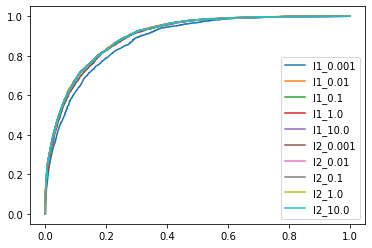

In [38]:
for i in range(len(params)):
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.show()

In [42]:
for i in range(len(params)):
    print('{}_{}: {}'.format(params[i][0], params[i][1], scores[i]))

l1_0.001: 0.8820945403162752
l1_0.01: 0.9030682065191709
l1_0.1: 0.9031449369056045
l1_1.0: 0.9026234052710506
l1_10.0: 0.9024563046758283
l2_0.001: 0.897732583875329
l2_0.01: 0.9022936996025805
l2_0.1: 0.9026508637149308
l2_1.0: 0.9025106851660802
l2_10.0: 0.9024832011794615


In [ ]:
pass